# World GDP Analysis

In [ ]:
'''
Here are the questions I asked on the provided dataset:

What are the unique country names in the dataset?
What is the maximum value recorded in the dataset?
How many unique country codes are there?
What is the average value across all years?
How many years of data are available in the dataset?
What is the value for the Arab World in the year 1974?
Which country had the highest value in a specific year (e.g., 1969)?
What is the total value for each country?
What is the value for a specific country (e.g., 'Arab World') in each year?
Is there any missing data (NaN) in the dataset?
'''

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv('gdp_csv.csv')

In [2]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [4]:
df.tail()

,Country Name,Country Code,Year,Value
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10
11506,Zimbabwe,ZWE,2016,1.661996e+10


In [5]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


In [6]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [7]:
# 1. What are the unique country names in the dataset?
unique_countries = df['Country Name'].unique()
print("Unique country names:", unique_countries)

Unique country names: ['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle income'
 'North America' 'OE

In [8]:
# 2. What is the maximum value recorded in the dataset?
max_value = df['Value'].max()
print("Maximum value:", max_value)

Maximum value: 79049230590610.9


In [9]:
# 3. How many unique country codes are there?
unique_country_codes = df['Country Code'].nunique()
print("Number of unique country codes:", unique_country_codes)

Number of unique country codes: 256


In [10]:
# 4. What is the average value across all years?
average_value = df['Value'].mean()
print("Average value:", average_value)

Average value: 1005972329901.0602


In [13]:
# 5. How many years of data are available in the dataset?
years_available = df['Year'].nunique()
print("Number of years available:", years_available)


Number of years available: 57


In [15]:
# 6. What is the value for the Arab World in the year 1974?
arab_world_value_1974 = df.loc[(df['Country Name'] == 'Arab World') & (df['Year'] == 1974), 'Value'].item()
print("Value for Arab World in 1974:", arab_world_value_1974)


Value for Arab World in 1974: 105145803084.377


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  


In [43]:
# 7. Which country had the highest value in a specific year (e.g., 1986)?
year = 2001
filtered_data = df[df['Country Name'] != 'World']  # Exclude "World" country
year_data = filtered_data[filtered_data['Year'] == year]

if not year_data.empty:
    max_value_index = year_data['Value'].idxmax()
    country_with_highest_value = year_data.loc[max_value_index, 'Country Name']
    print("Country with the highest value in", year, ":", country_with_highest_value)
else:
    print("No valid data available for the specified year.")


Country with the highest value in 2001 : High income


Total value by country:
 Country Name
Afghanistan           2.366034e+11
Albania               1.983750e+11
Algeria               3.504056e+12
American Samoa        8.708000e+09
Andorra               6.901899e+10
                          ...     
West Bank and Gaza    1.529138e+11
World                 1.487469e+15
Yemen, Rep.           4.715165e+11
Zambia                3.607919e+11
Zimbabwe              3.582267e+11
Name: Value, Length: 256, dtype: float64


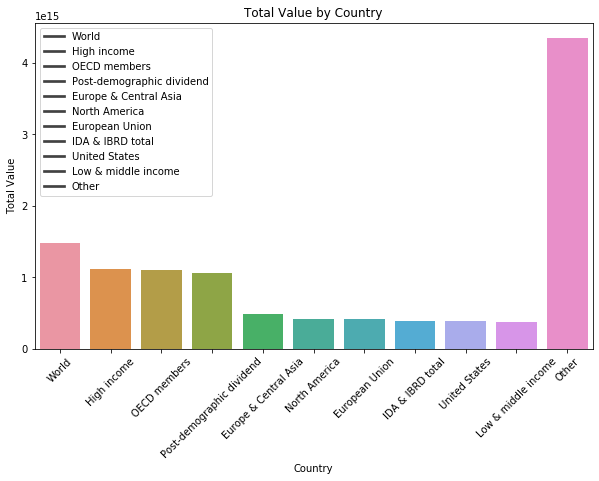

In [47]:
# 8. What is the total value for each country?
total_value_by_country = df.groupby('Country Name')['Value'].sum()
print("Total value by country:\n", total_value_by_country)

# Filter out countries to display
top_countries = total_value_by_country.nlargest(10)
other_countries = total_value_by_country[~total_value_by_country.index.isin(top_countries.index)]
other_countries_sum = other_countries.sum()

# Combine top countries and 'Other' category
plot_data = top_countries.append(pd.Series(other_countries_sum, index=['Other']))

# Bar plot: Total Value by Country
plt.figure(figsize=(10, 6))
sns.barplot(x=plot_data.index, y=plot_data.values)
plt.title("Total Value by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.xticks(rotation=45)

# Create legend for top countries
legend_labels = list(top_countries.index) + ['Other']
plt.legend(legend_labels)

plt.show()


Value for Sierra Leone in each year:
       Year         Value
9519  1960  3.220095e+08
9520  1961  3.278347e+08
9521  1962  3.427216e+08
9522  1963  3.485470e+08
9523  1964  3.718481e+08
9524  1965  3.593799e+08
9525  1966  3.754798e+08
9526  1967  3.487953e+08
9527  1968  3.298601e+08
9528  1969  4.086902e+08
9529  1970  4.344104e+08
9530  1971  4.195494e+08
9531  1972  4.653811e+08
9532  1973  5.752302e+08
9533  1974  6.485906e+08
9534  1975  6.793359e+08
9535  1976  5.948957e+08
9536  1977  6.917778e+08
9537  1978  9.607283e+08
9538  1979  1.109375e+09
9539  1980  1.100686e+09
9540  1981  1.114830e+09
9541  1982  1.295362e+09
9542  1983  9.951043e+08
9543  1984  1.087472e+09
9544  1985  8.568905e+08
9545  1986  4.901815e+08
9546  1987  7.013076e+08
9547  1988  1.055084e+09
9548  1989  9.329744e+08
9549  1990  6.496448e+08
9550  1991  7.799815e+08
9551  1992  6.799980e+08
9552  1993  7.688123e+08
9553  1994  9.119160e+08
9554  1995  8.707587e+08
9555  1996  9.417422e+08
9556  1997  

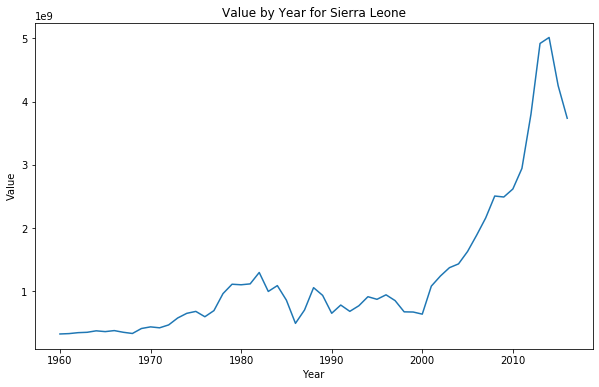

In [23]:
# 9. What is the value for a specific country (e.g., 'Arab World') in each year?
country = 'Sierra Leone'
value_by_year_for_country = df.loc[df['Country Name'] == country, ['Year', 'Value']]
print("Value for", country, "in each year:\n", value_by_year_for_country)

# Line plot: Value by Year for a specific country
plt.figure(figsize=(10, 6))
sns.lineplot(data=value_by_year_for_country, x='Year', y='Value')
plt.title("Value by Year for " + country)
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


In [24]:
# 10. Is there any missing data (NaN) in the dataset?
missing_data = df.isnull().values.any()
print("Missing data in the dataset:", missing_data)

Missing data in the dataset: False
